In [1]:
import time
start_time=time.time()

In [2]:
import sys
from pathlib import Path
import json
import numpy as np
from astropy.io import fits
#import strucfunc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
dist = 50000 #parsecs
pix = 0.2 #arcsec
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0=(0.9*pc)/2.355
pc,s0


(0.24240684055476797, 0.09263955689991132)

In [4]:
hdulist = fits.open("Obs/GAUS_Ha6562.8_060_Will.fits")

In [5]:
n = None
sb = hdulist[1].data[:n, :n].astype(np.float64)
vv = hdulist[2].data[:n, :n].astype(np.float64)
ss = hdulist[3].data[:n, :n].astype(np.float64)

In [6]:
## Replace spurious values in the arrays
#m = ~np.isfinite(sb*vv*ss) | (sb < 0.0)

#sb[m] = 0.0
#vv[m] = np.nanmean(vv)
#ss[m] = 0.0
#sb /= sb.max()

#good = (~m) & (sb > 0.001)


In [7]:
len(vv)

650

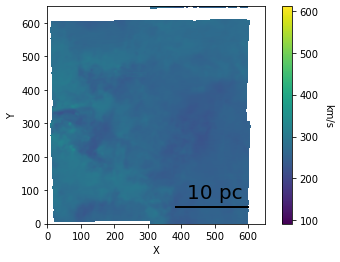

In [8]:
fig, ax = plt.subplots()


dataRV=vv
plt.figure(1)
plt.imshow(dataRV, cmap='viridis')
cbar = plt.colorbar()
#plt.clim(225,350)
cbar.set_label('km/s', rotation=270, labelpad=15)  

ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.text(0.9, 0.1, '10 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=50, xmin=0.59, xmax=0.925, linewidth=2, color = 'k')


plt.gca().invert_yaxis()

In [9]:
m2 = (vv > 200) & (vv < 350)

<ipython-input-9-af33e13a0580>:1: RuntimeWarning: invalid value encountered in greater
  m2 = (vv > 200) & (vv < 350)
<ipython-input-9-af33e13a0580>:1: RuntimeWarning: invalid value encountered in less
  m2 = (vv > 200) & (vv < 350)


In [10]:
RV=pd.DataFrame(vv[m2])

In [11]:
RV=RV.stack().reset_index()

Text(0.5, 6.79999999999999, 'Radial velocity [km/s]')

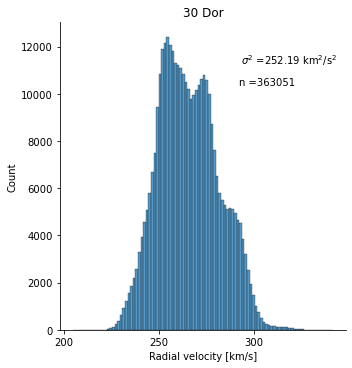

In [12]:
#sns.displot(RV[0]-RV[0].mean(),bins=100)
sns.displot(RV[0],bins=100)

#plt.xlim(-55,55)

plt.text(0.75, 1.15,'n ='+str(RV[0].count()), ha='center', va='center', transform=ax.transAxes, color='k')
#plt.text(0.80, 0.82,'$μ$ ='+str(np.round(RV[0].mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.85, 1.25,'$σ^{2}$ ='+str(np.round(RV[0].var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('30 Dor')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"
plt.xlabel('Radial velocity [km/s]')

In [13]:
df=pd.DataFrame(vv[m2]).stack().reset_index().rename(columns={'level_0':'X', 'level_1':'Y', 0:'RV'})
df.describe()

,X,Y,RV
count,363051.000000,363051.0,363051.000000
mean,181525.000000,0.0,265.557837
std,104803.940627,0.0,15.880470
min,0.000000,0.0,204.711615
25%,90762.500000,0.0,253.588414
50%,181525.000000,0.0,264.409554
75%,272287.500000,0.0,276.421349
max,363050.000000,0.0,341.161333


In [14]:
#Dor = {'Dor' : df,
#      }
#Dor

In [15]:
import pickle

f = open('VF\\Dor.pkl',"wb")
pickle.dump(df,f)
f.close()

In [16]:
Dor = {'sb' : sb,
       'vv' : vv,
       'ss' : ss,
        'pc' : pc,
        's0' : s0,
        'pix' : pix,
      }
Dor

{'sb': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'vv': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'ss': array([[0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        ...,
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68],
        [0.68, 0.68, 0.68, ..., 0.68, 0.68, 0.68]]),
 'pc': 0.24240684055476797,
 's0': 0.09263955689991132,
 'pix': 0.2}

In [17]:
f = open('VFM\\Dor.pkl',"wb")
pickle.dump(Dor,f)
f.close()

In [18]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 4.7317492961883545 seconds ---
